# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.4.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [14]:
harrypotter_movies = movies[movies['title'].str.contains('Harry Potter', case=False)]
print ('Total Harry Potter movies:', len(harrypotter_movies))
harrypotter_movies

Total Harry Potter movies: 8


,title,year
50581,Harry Potter and the Order of the Phoenix,2007
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
109213,Harry Potter and the Half-Blood Prince,2009
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
187926,Harry Potter and the Goblet of Fire,2005
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [17]:
print ('%d movies were made in 2015' % len(movies[movies['year'] == 2015]))

8702 movies were made in 2015


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [18]:
movies_in_2000_2018 = movies[(movies.year >= 2000) & (movies.year <= 2018)]
print ('%d movies were made in 2000~2018' % len(movies_in_2000_2018))

114070 movies were made in 2000~2018


### Section I - Q4: How many movies are titled "Hamlet"?

In [21]:
hamlet_movies =  movies[movies['title'] == 'Hamlet']
print ('%d movies are titled "Hamlet"' % len(hamlet_movies))

20 movies are titled "Hamlet"


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [22]:
hamlet_after2000 = movies[(movies['title'] == 'Hamlet') & (movies['year'] >= 2000)]
print (hamlet_after2000.sort_values('year'))

         title  year
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [24]:
inception_supportingcast = cast[(cast['n'].isna()) & (cast['title'] == 'Inception')]
print ('There were %d supporting cast roles in the movie "Inception"' % len(inception_supportingcast))
inception_supportingcast

There were 27 supporting cast roles in the movie "Inception"


,title,year,name,type,character,n
98153,Inception,2010,Michael (III) August,actor,LAX Passenger,NaN
197877,Inception,2010,Ken Bhan,actor,Mombasan Gambler,NaN
374661,Inception,2010,John Ceallach,actor,LAX Passenger,NaN
497161,Inception,2010,Garvin Cross,actor,Snow Commander,NaN
684098,Inception,2010,Seve Esposito,actor,Italian Gambler,NaN
690634,Inception,2010,Marcus (II) Everett,actor,Stock Broker,NaN
707642,Inception,2010,Zachary Christopher Fay,actor,Extra,NaN
836295,Inception,2010,Daniel Girondeaud,actor,Bridge Sub Con,NaN
1006636,Inception,2010,Andrew Hoagland,actor,Pedestrian,NaN
1095095,Inception,2010,Charles Jarrell,actor,Hotel Guest,NaN


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [25]:
inception_maincast = cast[(~cast['n'].isna()) & (cast['title'] == 'Inception')]
print ('There were %d main cast roles in the movie "Inception"' % len(inception_maincast))
inception_maincast

There were 51 main cast roles in the movie "Inception"


,title,year,name,type,character,n
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
260128,Inception,2010,Virgile Bramly,actor,Bridge Sub Con,29.0
326745,Inception,2010,Michael Caine,actor,Miles,11.0
333415,Inception,2010,Earl Cameron,actor,Elderly Bald Man,20.0
433867,Inception,2010,Nicolas Clerc,actor,Bridge Sub Con,26.0
444385,Inception,2010,Adam (IV) Cole,actor,Bar Sub Con,34.0
517227,Inception,2010,Jean-Michel Dagory,actor,Bridge Sub Con,30.0
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
709436,Inception,2010,Russ Fega,actor,Cab Driver,23.0


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [26]:
print (inception_maincast.sort_values('n').head(10))

             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [27]:
print (cast[cast['character'] == 'Albus Dumbledore'])

                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus Du

In [29]:
print (cast.loc[cast['character'] == 'Albus Dumbledore', 'name'].unique())

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [33]:
kreeves_cast = cast[cast['name'] == 'Keanu Reeves']
print ('The roles Keanu Reeves had played throughout his career:')
print (kreeves_cast['character'].unique())

The roles Keanu Reeves had played throughout his career:
['Kai' 'Bob Arctor' 'Paul Sutton' 'Ted' 'Eddie Kasalivich'
 'John Constantine' 'Chevalier Danceny' 'Jonathan Harker' 'Dogstar'
 'Julian Gitche' 'Detective Galban' 'Jjaks Clayton' 'Tommy Warneki'
 'Ortiz the Dog Boy' 'John' "Conor O'Neill" 'Henry Torne' 'Marlon'
 'John Wick' 'Johnny Mnemonic' 'Keanu' 'Evan' 'Siddhartha' 'Donaka Mark'
 'Himself' 'Don John' 'Scott Favor' 'Ron Petrie' 'Tod' 'Chris Townsend'
 'Johnny Utah' 'Matt' 'Lucas Hill' 'Julian Mercer' 'Jack Traven'
 'Keanu Reeves' 'Detective Tom Ludlow' 'Nelson Moss' 'The Dream' 'Klaatu'
 'Kevin Lomax' 'Donnie Barksdale' 'Alex Wyler' 'Harry' 'Neo' 'Hank'
 'Winston Connelly' 'Rupert Marshetta' 'Chris Nadeau' 'Shane Falco'
 'Griffin' 'Ramsey' 'Perry Lyman' 'Dr. Beckham' 'Martin Loader' 'Heaver']


In [42]:
kreeves_sorted = kreeves_cast.sort_values('year')
print (kreeves_sorted[(kreeves_sorted.year >= 1999) & (kreeves_sorted.n <= 1.0)])

                                 title  year          name   type  \
1892390                     The Matrix  1999  Keanu Reeves  actor   
1892397               The Replacements  2000  Keanu Reeves  actor   
1892358                      Hard Ball  2001  Keanu Reeves  actor   
1892383                 Sweet November  2001  Keanu Reeves  actor   
1892348                    Constantine  2005  Keanu Reeves  actor   
1892388                 The Lake House  2006  Keanu Reeves  actor   
1892382                   Street Kings  2008  Keanu Reeves  actor   
1892385  The Day the Earth Stood Still  2008  Keanu Reeves  actor   
1892359                  Henry's Crime  2010  Keanu Reeves  actor   
1892342                       47 Ronin  2013  Keanu Reeves  actor   
1892361                      John Wick  2014  Keanu Reeves  actor   
1892366                    Knock Knock  2015  Keanu Reeves  actor   
1892399                The Whole Truth  2016  Keanu Reeves  actor   
1892362           John Wick: Chapt

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [46]:
type_actor = cast[cast.type == 'actor']
type_actress = cast[cast.type == 'actress']
print ('The total number of actor in 1950~1960:', len(type_actor[(type_actor.year >= 1950) & (type_actor.year <= 1960)]))
print ('The total number of actress in 1950~1960:', len(type_actress[(type_actress.year >= 1950) & (type_actress.year <= 1960)]))

The total number of actor in 1950~1960: 171302
The total number of actress in 1950~1960: 63333


In [47]:
print ('The total number of actor in 2007~2017:', len(type_actor[(type_actor.year >= 2007) & (type_actor.year <= 2017)]))
print ('The total number of actress in 2007~2017:', len(type_actress[(type_actress.year >= 2007) & (type_actress.year <= 2017)]))

The total number of actor in 2007~2017: 922782
The total number of actress in 2007~2017: 529631


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [45]:
print ('The total number of leading roles after 2000:')
print (cast[(cast.year >= 2000) & (cast.n <= 1.0)])

The total number of leading roles after 2000:
                          title  year              name     type  \
102      Live Freaky Die Freaky  2006           Nick 13    actor   
138       All Things Fall Apart  2011           50 Cent    actor   
144                 Freelancers  2012           50 Cent    actor   
145      Get Rich or Die Tryin'  2005           50 Cent    actor   
146                         Gun  2010           50 Cent    actor   
...                         ...   ...               ...      ...   
3785795                     120  2008       ?zge ?zberk  actress   
3785893                      6A  2016       Emine ?zkan  actress   
3785961                  Kadife  2012      Ayta? ?ztuna  actress   
3786008              Dig og mig  2008  Julie R. ?lgaard  actress   
3786011    Fortune Defies Death  2017  Julie R. ?lgaard  actress   

              character    n  
102      TV Reporter #1  1.0  
138                Deon  1.0  
144                Malo  1.0  
145          

In [48]:
print ('The total number of non-leading roles after 2000:')
print (cast[(cast.year >= 2000) & (cast.n > 1.0)])

The total number of non-leading roles after 2000:
                                                     title  year  \
0                                           Closet Monster  2015   
2                                      Battle of the Sexes  2017   
8        Lapis, Ballpen at Diploma, a True to Life Journey  2014   
10                                 When the Man Went South  2014   
11                                 Little Angel (Angelita)  2015   
...                                                    ...   ...   
3786163                                  Beowulf & Grendel  2005   
3786164                                               Eden  2018   
3786169                   Niceland (Population. 1.000.002)  2004   
3786172                   Niceland (Population. 1.000.002)  2004   
3786174                                       U.S.S.S.S...  2003   

                                   name     type               character     n  
0                              Buffy #1    actor    

In [49]:
print ('The total number of supporting roles after 2000:')
print (cast[(cast.year >= 2000) & (cast.n.isna())])

The total number of supporting roles after 2000:
                          title  year                         name     type  \
3          Secret in Their Eyes  2015                      $hutter    actor   
4                    Steve Jobs  2015                      $hutter    actor   
5        Straight Outta Compton  2015                      $hutter    actor   
6        Straight Outta Compton  2015                      $hutter    actor   
7                For Thy Love 2  2009                 Bee Moe $lim    actor   
...                         ...   ...                          ...      ...   
3786159                Eldfjall  2011      Katla M. ?orgeirsd?ttir  actress   
3786160               Svanurinn  2017      Katla M. ?orgeirsd?ttir  actress   
3786166               Foreldrar  2007  Lilja Gu?r?n ?orvaldsd?ttir  actress   
3786167                 Rokland  2011  Lilja Gu?r?n ?orvaldsd?ttir  actress   
3786168                      XL  2013  Lilja Gu?r?n ?orvaldsd?ttir  actress   

  

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [50]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

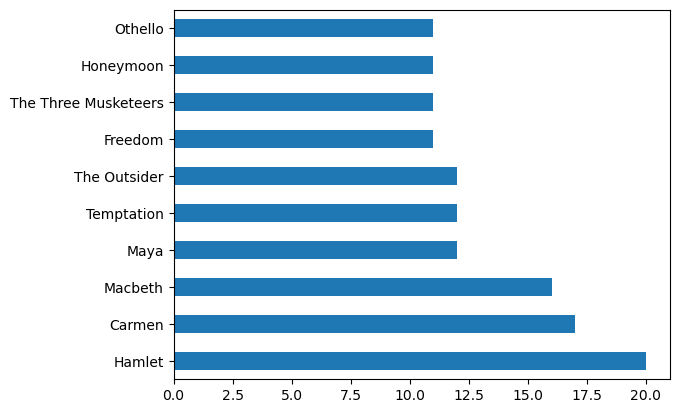

In [51]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [59]:
year_number = movies['year'].value_counts()
print ('Years after 2000 saw the most movies released')
print (year_number.sort_values(ascending=False).head(3))

Years after 2000 saw the most movies released
2017    11474
2016     9440
2015     8702
Name: year, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:title={'center':'Total number of movies released per-decade'}>

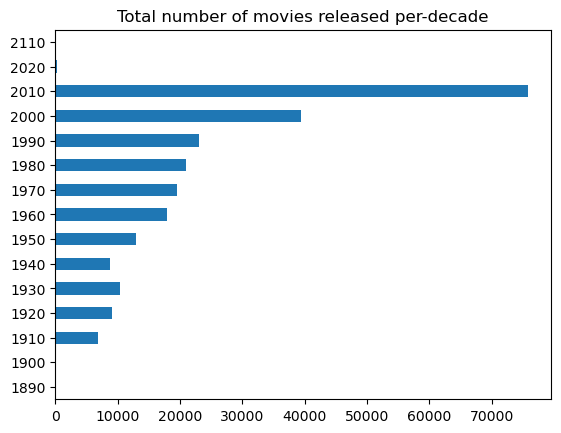

In [66]:
movies_decade = movies.copy()
movies_decade['decade'] = movies_decade['year'].apply(lambda x: int(x/10)*10)
decade_srt = movies_decade['decade'].value_counts().sort_index()
decade_srt.plot(kind='barh', title='Total number of movies released per-decade')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [68]:
char_count = cast['character'].value_counts()
print ('The top10 most common character names in movie history:')
print (char_count.sort_values(ascending=False).head(10))

The top10 most common character names in movie history:
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64


In [69]:
print ('The top10 people played "Herself" in movie history:')
print (cast.loc[cast.character == 'Herself', 'name'].value_counts().sort_values(ascending=False).head(10))

The top10 people played "Herself" in movie history:
Queen Elizabeth II        12
Luisa Horga                9
Mar?a Luisa (V) Mart?n     9
Joyce Brothers             9
Margaret Thatcher          8
Hillary Clinton            8
Marilyn Monroe             6
Rekha                      6
Oprah Winfrey              6
Joan Rivers                6
Name: name, dtype: int64


In [70]:
print ('The top10 people played "Himself" in movie history:')
print (cast.loc[cast.character == 'Himself', 'name'].value_counts().sort_values(ascending=False).head(10))

The top10 people played "Himself" in movie history:
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [73]:
print ('The top10 most frequent "Zombie" roles:')
print (cast.loc[cast.character.str.startswith('Zombie'), 'character'].value_counts().sort_values(ascending=False).head(10))

The top10 most frequent "Zombie" roles:
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64


In [74]:
print ('The top10 most frequent "Police" roles:')
print (cast.loc[cast.character.str.startswith('Police'), 'character'].value_counts().sort_values(ascending=False).head(10))

The top10 most frequent "Police" roles:
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [81]:
kreeves_cast_year_roles = kreeves_cast['year'].value_counts().sort_index()
print ('Roles Keanu Reeves played in each year:')
print (kreeves_cast_year_roles)

Roles Keanu Reeves played in each year:
1985    1
1986    3
1988    4
1989    2
1990    2
1991    3
1992    1
1993    4
1994    1
1995    2
1996    2
1997    2
1999    3
2000    3
2001    2
2003    3
2005    3
2006    2
2008    2
2009    1
2010    1
2012    1
2013    2
2014    1
2015    1
2016    5
2017    3
2018    1
2019    1
Name: year, dtype: int64


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


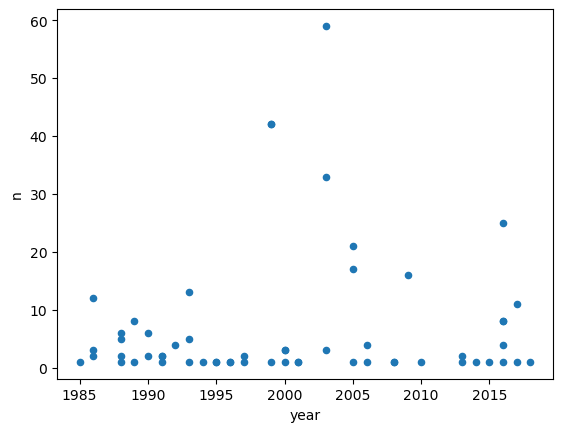

In [83]:
kreeves_cast.plot(x='year', y='n', kind='scatter')
plt.show()

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

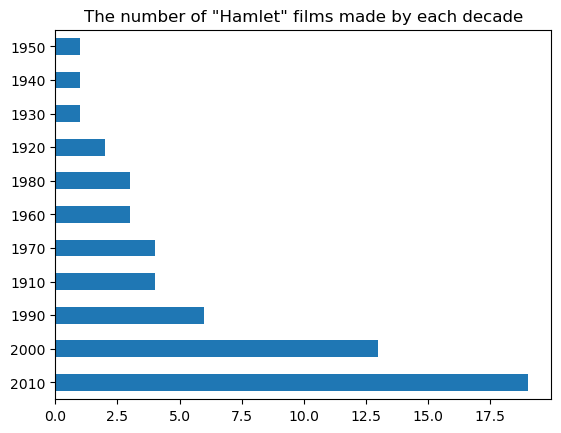

In [89]:
hamlet_movies = movies_decade[movies_decade['title'].str.contains('Hamlet', case=False)].sort_values('decade')
hamlet_per_decade = hamlet_movies['decade'].value_counts()
hamlet_per_decade.plot(kind='barh', title='The number of "Hamlet" films made by each decade')
plt.show()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [90]:
leadingroles = cast[cast['n'] == 1.0]
print ('The number of leading roles in the 1960s:')
print (leadingroles[(leadingroles.year >= 1960) & (leadingroles.year <= 1969)]['type'].value_counts())

The number of leading roles in the 1960s:
actor      8320
actress    3503
Name: type, dtype: int64


In [91]:
print ('The number of leading roles in the 2000s:')
print (leadingroles[(leadingroles.year >= 2000) & (leadingroles.year <= 2009)]['type'].value_counts())

The number of leading roles in the 2000s:
actor      18557
actress     7787
Name: type, dtype: int64


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [148]:
foz_roles = cast[cast['name'] == 'Frank Oz'].sort_values('year')
movies_selected = [x for x in foz_roles.title.unique() if len(foz_roles[foz_roles.title == x]) > 1]
print ('The films in which Frank Oz has played more than 1 role:')
print (foz_roles[foz_roles['title'].isin(movies_selected)])

The films in which Frank Oz has played more than 1 role:
                                        title  year      name   type  \
1723645                      The Muppet Movie  1979  Frank Oz  actor   
1723652                      The Muppet Movie  1979  Frank Oz  actor   
1723651                      The Muppet Movie  1979  Frank Oz  actor   
1723650                      The Muppet Movie  1979  Frank Oz  actor   
1723649                      The Muppet Movie  1979  Frank Oz  actor   
1723648                      The Muppet Movie  1979  Frank Oz  actor   
1723647                      The Muppet Movie  1979  Frank Oz  actor   
1723646                      The Muppet Movie  1979  Frank Oz  actor   
1723637                The Great Muppet Caper  1981  Frank Oz  actor   
1723636                The Great Muppet Caper  1981  Frank Oz  actor   
1723635                The Great Muppet Caper  1981  Frank Oz  actor   
1723634                The Great Muppet Caper  1981  Frank Oz  actor   
1723633

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [151]:
char_selected = [x for x in foz_roles.character.unique() if len(foz_roles[foz_roles.character == x]) > 1]
print (char_selected)
print ('The characters Frank Oz has portrayed at least twice:')
print (foz_roles[foz_roles['character'].isin(char_selected)])

['Miss Piggy', 'Sam the Eagle', 'Animal', 'Fozzie Bear', 'Yoda', 'Cookie Monster', 'Bert', 'Grover']
The characters Frank Oz has portrayed at least twice:
                                                  title  year      name  \
1723645                                The Muppet Movie  1979  Frank Oz   
1723648                                The Muppet Movie  1979  Frank Oz   
1723647                                The Muppet Movie  1979  Frank Oz   
1723646                                The Muppet Movie  1979  Frank Oz   
1723621  Star Wars: Episode V - The Empire Strikes Back  1980  Frank Oz   
1723635                          The Great Muppet Caper  1981  Frank Oz   
1723634                          The Great Muppet Caper  1981  Frank Oz   
1723633                          The Great Muppet Caper  1981  Frank Oz   
1723632                          The Great Muppet Caper  1981  Frank Oz   
1723599                  An American Werewolf in London  1981  Frank Oz   
1723622      Star Wa

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

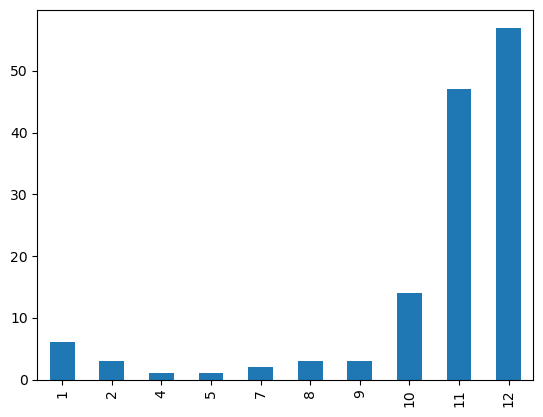

In [152]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

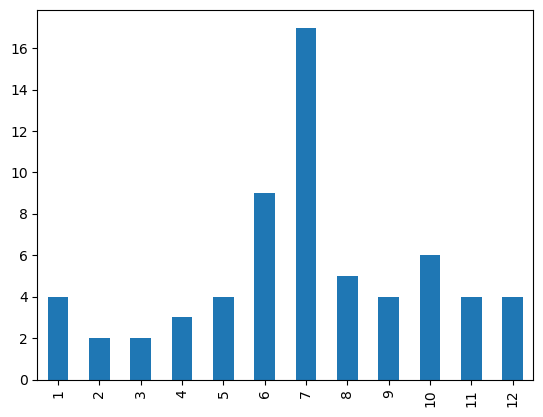

In [153]:
christmas = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

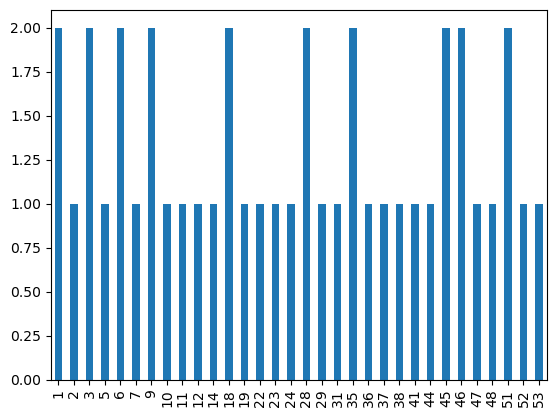

In [155]:
christmas = release_dates[(release_dates.title.str.contains('Action', case=False)) & (release_dates.country == 'USA')]
christmas.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')
plt.show()

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [160]:
movies_kreeves_leadingrole = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1.0)]
usa_release = release_dates[release_dates['country'] == 'USA']
kreeves_usa = movies_kreeves_leadingrole.merge(usa_release, on=['title', 'year'])
print (kreeves_usa.sort_values('date'))

                               title  year          name   type  \
20                  The Night Before  1988  Keanu Reeves  actor   
3   Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
2         Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
12                     Little Buddha  1993  Keanu Reeves  actor   
13                             Speed  1994  Keanu Reeves  actor   
10                   Johnny Mnemonic  1995  Keanu Reeves  actor   
1               A Walk in the Clouds  1995  Keanu Reeves  actor   
4                     Chain Reaction  1996  Keanu Reeves  actor   
6                  Feeling Minnesota  1996  Keanu Reeves  actor   
17              The Devil's Advocate  1997  Keanu Reeves  actor   
19                        The Matrix  1999  Keanu Reeves  actor   
21                  The Replacements  2000  Keanu Reeves  actor   
15                    Sweet November  2001  Keanu Reeves  actor   
7                          Hard Ball  2001  Keanu Reeves  acto

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

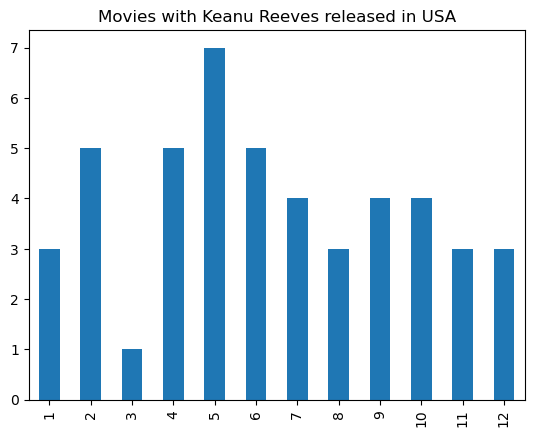

In [163]:
kreeves_usa = kreeves_cast.merge(usa_release, on=['title', 'year'], how='inner')
kreeves_usa['date'].dt.month.value_counts().sort_index().plot(kind='bar', title='Movies with Keanu Reeves released in USA')
plt.show()

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

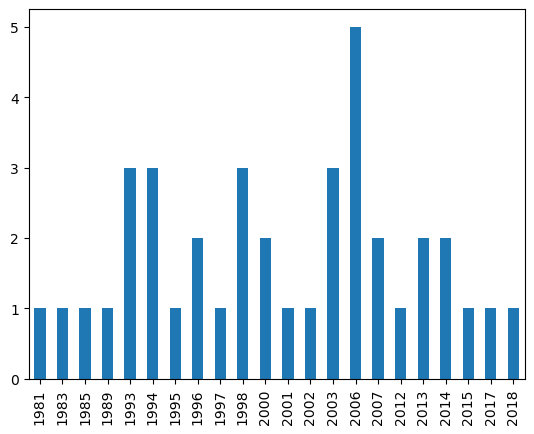

In [164]:
ian_cast = cast[cast['name'] == 'Ian McKellen']
ian_usa = ian_cast.merge(usa_release, on=['title', 'year'], how='inner')
ian_usa['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.show()